## Group No 38

## Group Member Names:
1. Amol Nishikant Kelkar (2022AA05165)
2. Shelly Chauhan (2022AA05034)
3. Kalpana Singh (2022AA05146)

## Journal used for the implemetation
Journal title:  Facial Expression Recognition and Face Recognition Using a Convolutional Neural Network

Authors:

Journal Name:

Year:

Choosen Application Area is Expression Recoginition from images
We have choosen Paper 2 for the recognition
Facial Expression recognition using CNN

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

!kaggle datasets download -d msambare/fer2013

 81% 49.0M/60.3M [00:00<00:00, 104MB/s] 
100% 60.3M/60.3M [00:00<00:00, 108MB/s]


In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/Users/harpreetsingh/Desktop/SEM2/DNN/face-expression.zip' , 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt

#### Images were resized to 32 X 32 from input image size of 48 X 48 in the dataset

In [49]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'images/train',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(32, 32),
    shuffle=True
)

test_data = tf.keras.utils.image_dataset_from_directory(
    'images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(32, 32),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


#### Normalizing the images so that each cell comtains value from 0 to 1.

In [5]:
def normalize_data(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_data.map(normalize_data)
test_ds = test_data.map(normalize_data)


In [51]:
train_ds.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [8]:
from keras.layers import Activation
from keras import regularizers

#### The first Simple CNN used in the paper has used 3 convolutional layers and 1 Dense layer with Dropout of 0.5

In [53]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), padding = 'valid', input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Conv2D(64, kernel_size = (5,5), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Conv2D(128, kernel_size = (5,5), padding = 'valid'))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation  = 'softmax'))


In [54]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 activation_14 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 activation_15 (Activation)  (None, 10, 10, 64)        0         
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                               

In [55]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history = model.fit(train_ds, epochs = 100, validation_data = test_ds,shuffle = 1)

Epoch 1/100


2883/2883 [==============================] - 13s 4ms/step - loss: 1.0069 - accuracy: 0.5963 - val_loss: 2.1076 - val_accuracy: 0.4382
Epoch 2/100
2883/2883 [==============================] - 12s 4ms/step - loss: 1.0141 - accuracy: 0.5931 - val_loss: 2.1338 - val_accuracy: 0.4220
Epoch 3/100
2883/2883 [==============================] - 12s 4ms/step - loss: 1.0067 - accuracy: 0.5970 - val_loss: 2.1203 - val_accuracy: 0.4326
Epoch 4/100
2883/2883 [==============================] - 12s 4ms/step - loss: 1.0060 - accuracy: 0.5972 - val_loss: 2.0609 - val_accuracy: 0.4321
Epoch 5/100
2883/2883 [==============================] - 13s 4ms/step - loss: 0.9985 - accuracy: 0.5994 - val_loss: 2.1641 - val_accuracy: 0.4249
Epoch 6/100
2883/2883 [==============================] - 13s 4ms/step - loss: 1.0166 - accuracy: 0.5927 - val_loss: 2.1499 - val_accuracy: 0.4352
Epoch 7/100
2883/2883 [==============================] - 13s 5ms/step - loss: 0.9962 - accuracy: 0.5990 - val_loss: 2.1596 - val_accurac

The Simple CNN model gave the validation accuracy of 43.91%. 

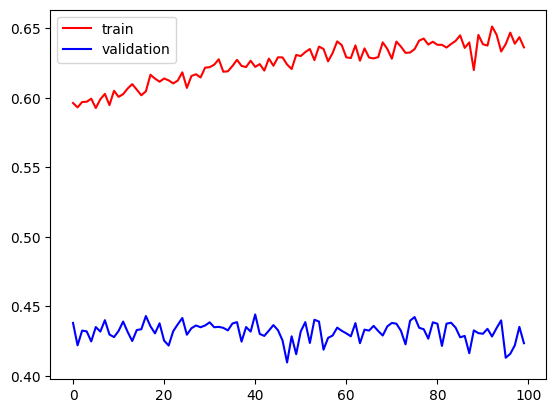

In [58]:

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

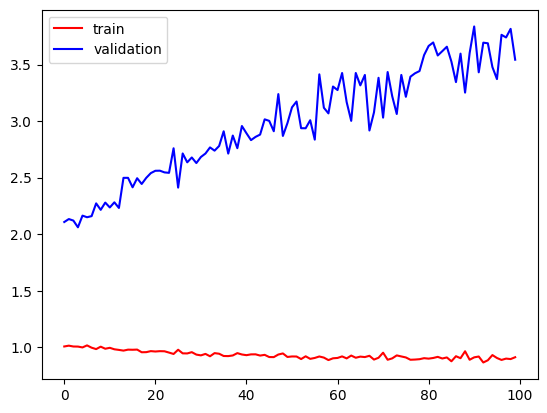

In [59]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [19]:
train_data_1 = tf.keras.utils.image_dataset_from_directory(
    'images/train',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(48, 48),
    shuffle=True
)

test_data_1 = tf.keras.utils.image_dataset_from_directory(
    'images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(48, 48),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [20]:
train_ds_1 = train_data_1.map(normalize_data)
test_ds_1 = test_data_1.map(normalize_data)

#### In the second attempt of improving model we have used 5 convolutional layers and 2 dense layers, but since the paper dataset was not available publically we have used the infamous Facial Expression Dataset for classification of  7 expressions

In [13]:
# Adding more layers to improve accuracy
# crashing the session RAM, hence reduced the batch size
n_model = Sequential()

n_model.add(Conv2D(48, kernel_size = (3,3), padding = 'valid', input_shape = (48,48,3)))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Conv2D(96, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
n_model.add(Conv2D(56, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
n_model.add(Conv2D(56, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Flatten())
n_model.add(Dense(128, activation = 'relu'))
n_model.add(Dropout(0.5))
n_model.add(Dense(56, activation = 'relu'))
n_model.add(Dropout(0.5))
#n_model.add(BatchNormalization())
n_model.add(Dense(7, activation  = 'softmax'))

In [14]:
n_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 48)        1344      
                                                                 
 activation_5 (Activation)   (None, 46, 46, 48)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 96)        41568     
                                                                 
 activation_6 (Activation)   (None, 21, 21, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 96)        0         
 g2D)                                                 

In [15]:
from keras.optimizers import SGD,Adam

In [22]:
learning_rate = 0.04
momentum = 0.5
decay_rate = 0.02/15
sgd = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=decay_rate,  nesterov=False)
# n_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

opt = Adam(lr=0.0005)
n_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
n_history = n_model.fit(train_ds_1, epochs = 5, validation_data = test_ds_1)

Epoch 1/5
2883/2883 [==============================] - 34s 12ms/step - loss: 1.8109 - accuracy: 0.2486 - val_loss: 1.8091 - val_accuracy: 0.2583
Epoch 2/5
2883/2883 [==============================] - 32s 11ms/step - loss: 1.8110 - accuracy: 0.2486 - val_loss: 1.8091 - val_accuracy: 0.2583
Epoch 3/5
2883/2883 [==============================] - 30s 10ms/step - loss: 1.8109 - accuracy: 0.2486 - val_loss: 1.8091 - val_accuracy: 0.2583
Epoch 4/5
2883/2883 [==============================] - 30s 10ms/step - loss: 1.8110 - accuracy: 0.2486 - val_loss: 1.8091 - val_accuracy: 0.2583
Epoch 5/5
2883/2883 [==============================] - 30s 10ms/step - loss: 1.8110 - accuracy: 0.2486 - val_loss: 1.8091 - val_accuracy: 0.2583


#### As it is observed that the model is stuck at the val loss of 1.8091 as well as validation accuracy of 0.2583
#### The stuck positions of the model can be seen in the below acuracy and loss graphs

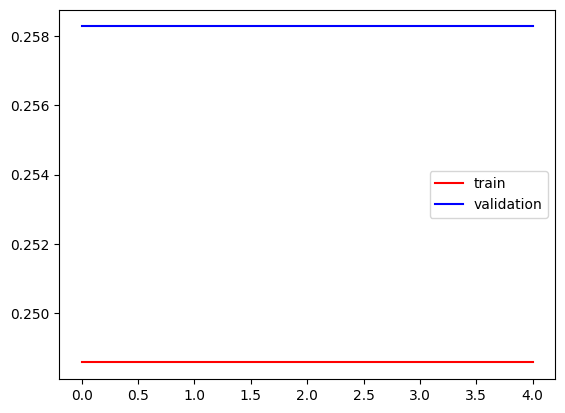

In [23]:

plt.plot(n_history.history['accuracy'], color = 'red', label='train')
plt.plot(n_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

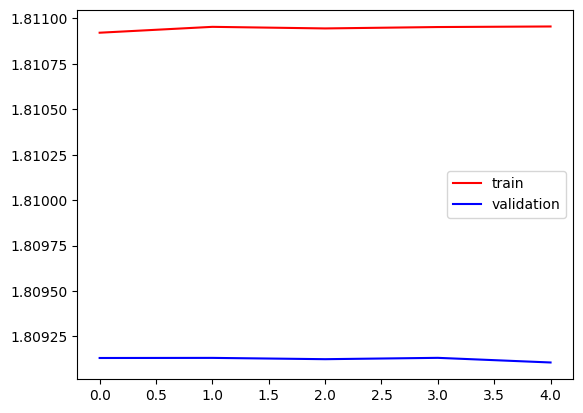

In [24]:
plt.plot(n_history.history['loss'], color = 'red', label='train')
plt.plot(n_history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [25]:
# Above model is stuck at a point, saddle point
from keras.layers import Activation

#### The model with the adaptable parameters from the paper was getting stuck at a validation accuracy of 0.2583
#### Hence modified the parameters in order to achieve better accuracy was attempted by us 
#### As per the paper they tried 30 epoches. Therefore, we have also used the same number of epoches

In [26]:
# Adding layers to improve accuracy
# crashing the session RAM, hence reduced the batch size
reg_model = Sequential()

reg_model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (48,48,3)))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Flatten())

reg_model.add(Dense(128,kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(Dropout(0.5))
reg_model.add(Dense(64,kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(Dropout(0.5))
reg_model.add(Dense(7, activation  = 'softmax'))

In [27]:
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        256       
 chNormalization)                                                
                                                      

In [29]:

reg_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
reg_history = reg_model.fit(train_ds_1, epochs = 30, validation_data = test_ds_1)

Epoch 1/30


2883/2883 [==============================] - 27s 9ms/step - loss: 2.1857 - accuracy: 0.2888 - val_loss: 2.2730 - val_accuracy: 0.3082
Epoch 2/30
2883/2883 [==============================] - 27s 9ms/step - loss: 1.7600 - accuracy: 0.4070 - val_loss: 1.7585 - val_accuracy: 0.4110
Epoch 3/30
2883/2883 [==============================] - 27s 9ms/step - loss: 1.6718 - accuracy: 0.4427 - val_loss: 1.8467 - val_accuracy: 0.3598
Epoch 4/30
2883/2883 [==============================] - 26s 9ms/step - loss: 1.6244 - accuracy: 0.4647 - val_loss: 1.5461 - val_accuracy: 0.4939
Epoch 5/30
2883/2883 [==============================] - 27s 9ms/step - loss: 1.5998 - accuracy: 0.4792 - val_loss: 1.6901 - val_accuracy: 0.4434
Epoch 6/30
2883/2883 [==============================] - 26s 9ms/step - loss: 1.5486 - accuracy: 0.5010 - val_loss: 1.4999 - val_accuracy: 0.5167
Epoch 7/30
2883/2883 [==============================] - 26s 9ms/step - loss: 1.5391 - accuracy: 0.5098 - val_loss: 1.5375 - val_accuracy: 0.5

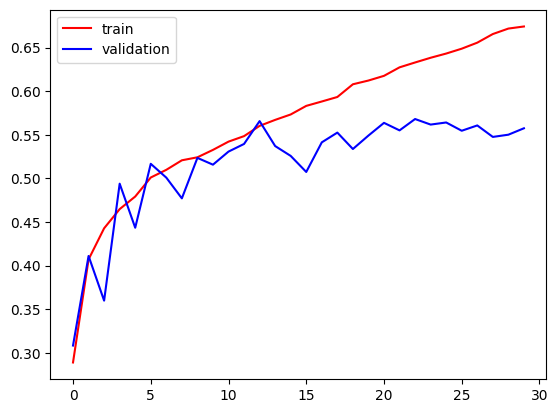

In [30]:
plt.plot(reg_history.history['accuracy'], color = 'red', label='train')
plt.plot(reg_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

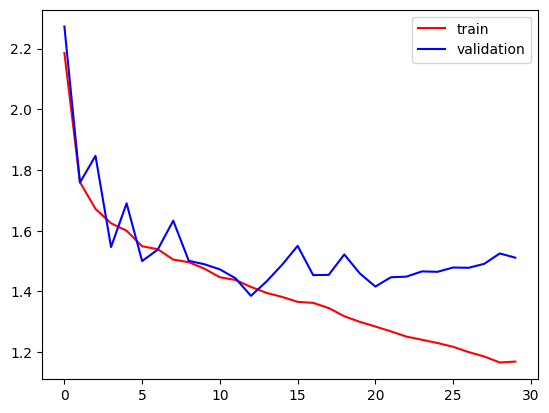

In [31]:
plt.plot(reg_history.history['loss'], color = 'red', label='train')
plt.plot(reg_history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

#### Conclusion : The Used dataset is a popular FER-2013 dataset. Which is shown to give max accuracy of nearly 66% in CCN, but
#### later on with ensemble technique and 6 other CNNs combined gave the acuracy of 76%, whose implementation was out of scope of this paper. This the best accuracy achieved by the model similar to what has been described in the research paper, but because of the data unavailability we used the infamous facial expression dataset in our code.